In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/iamdipsan/100-Days-ML/refs/heads/main/day-31/concrete_data.csv")

In [3]:

df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X=df.drop(columns='Strength')
y=df['Strength']

In [8]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
### Training the model without using the transformer

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(f" R² score without transformation: { r2_score(y_test, y_pred) }")

 R² score without transformation: 0.627553179231485


In [11]:
#### Cross-validation to get a more robust performance estimate

In [12]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
cv_score =np.mean(cross_val_score(lr,X,y,scoring='r2'))
print(f"Cross-validated R² score without transformation: {cv_score}")

Cross-validated R² score without transformation: 0.46099404916628606


In [13]:
###Plot histograms and Q-Q plots for each feature to check normality

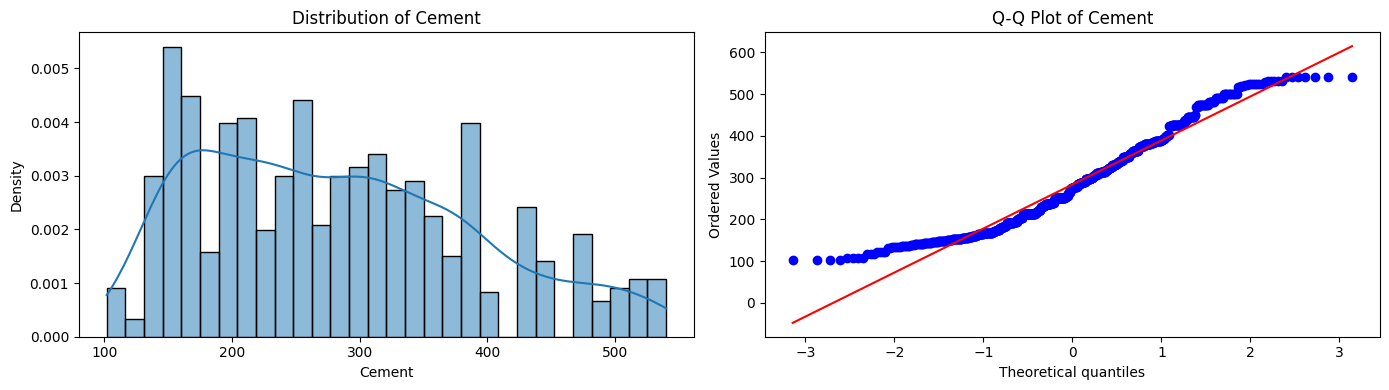

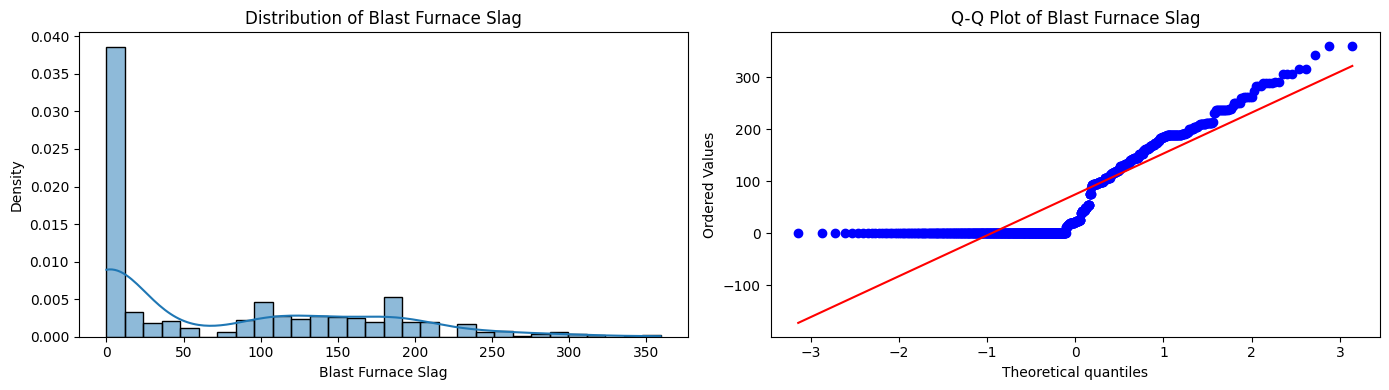

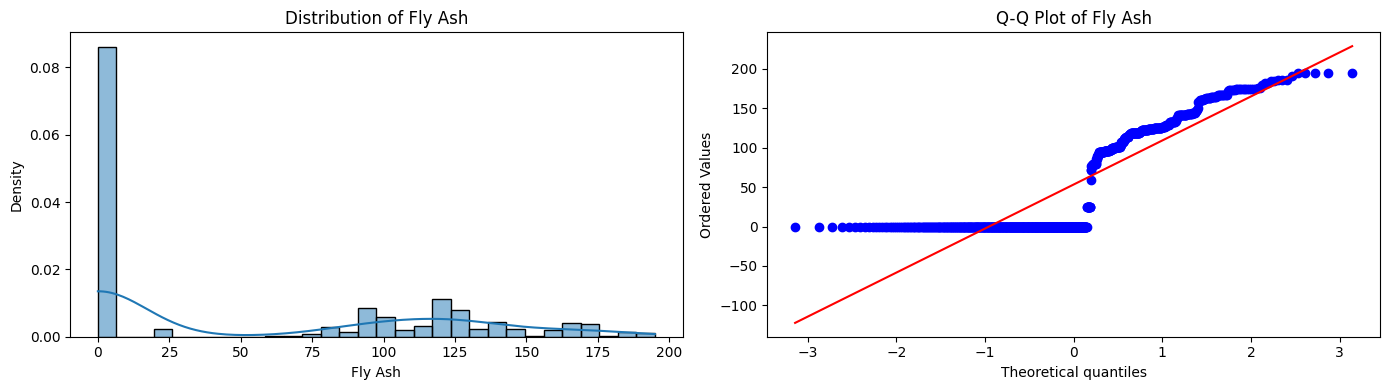

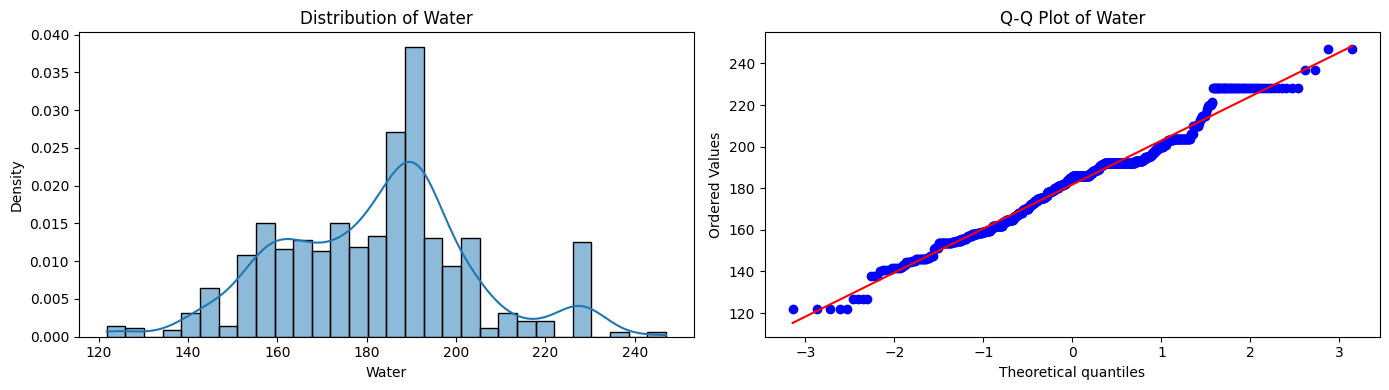

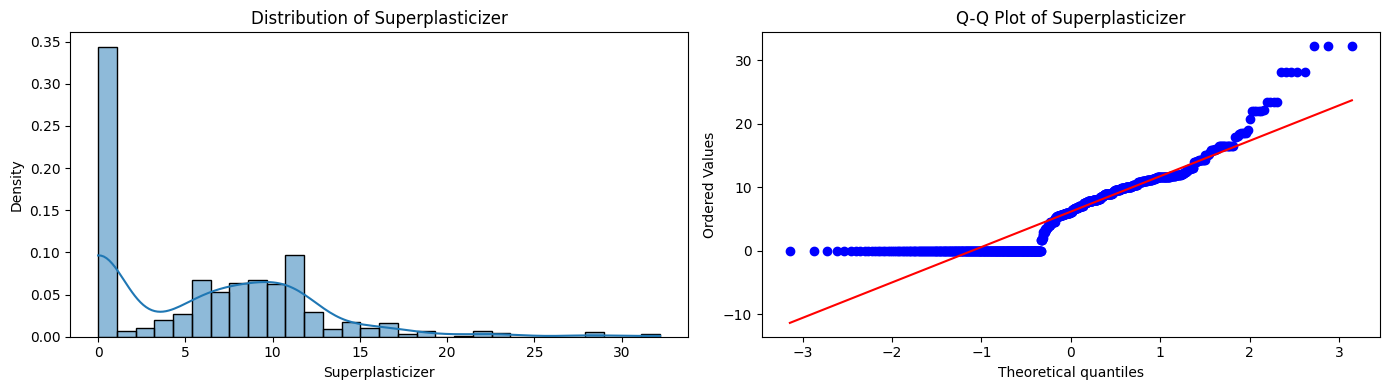

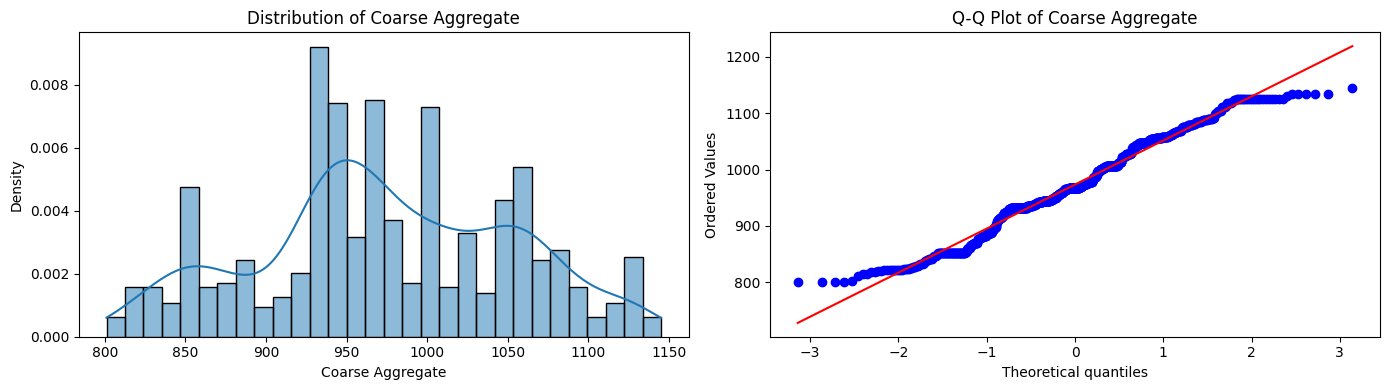

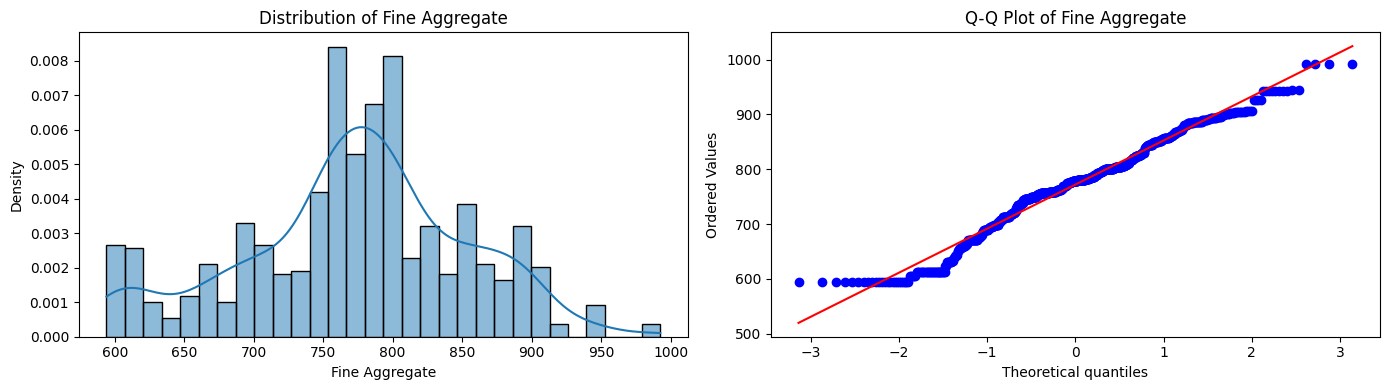

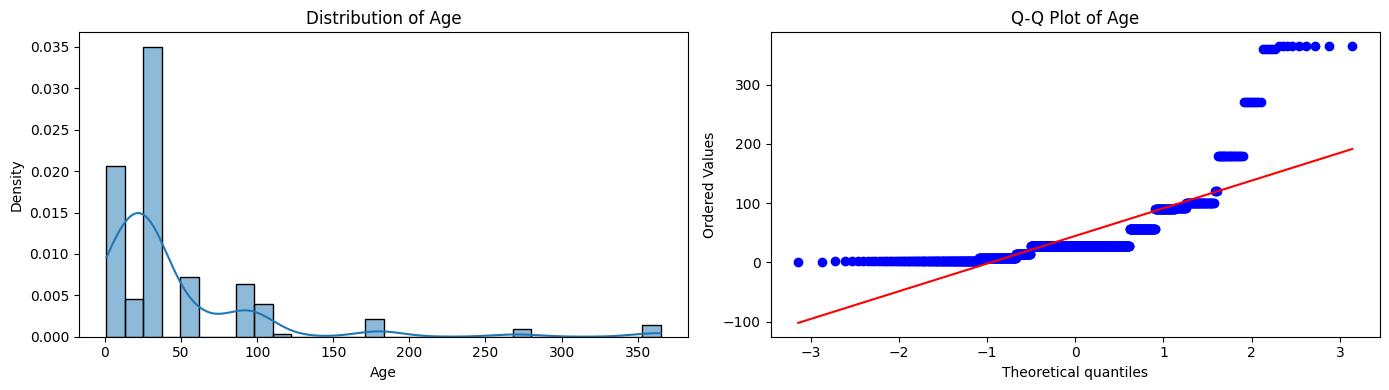

In [14]:
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Left: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], bins=30, kde=True, stat="density")
    plt.title(f'Distribution of {col}')

    # Right: Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

In [15]:
##Using Box-cox transformation to make the distributions close to normal distributions

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.000001)

lambdas_df = pd.DataFrame({
    'cols': X_train.columns,
    'box_cox_lambdas': pt.lambdas_
})

print(lambdas_df)

X_test_transformed=pt.transform(X_test+0.000001)

                 cols  box_cox_lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.025093
2             Fly Ash        -0.038970
3               Water         0.772682
4    Superplasticizer         0.098811
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782018
7                 Age         0.066631


In [19]:
###Converting transformed sets to dataFrame

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [20]:
X_train_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.106010
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.106010
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.675970
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.106010
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.997079,-0.887212,-1.769923,0.820684,0.390563,0.358776,-1.675970
820,-0.198733,-1.085667,1.133622,-1.839129,0.838861,1.445973,0.322797,-0.475625
821,-0.844517,-1.085667,1.133681,-0.706089,0.788486,1.345367,0.297157,1.246733
822,1.565624,0.925496,-0.887212,-0.019311,0.761011,-1.537255,0.076211,0.106010


In [21]:
X_train_transformed.mean()

,0
Cement,-4.052853e-16
Blast Furnace Slag,-3.664814e-17
Fly Ash,1.509041e-16
Water,-5.216970e-16
Superplasticizer,-1.724618e-17
Coarse Aggregate,9.808767e-16
Fine Aggregate,-2.371350e-16
Age,5.346317e-16


In [22]:

lr= LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [23]:

y_pred2= lr.predict(X_test_transformed)
print(f"R² score with Box-Cox transformation::{r2_score(y_test,y_pred2)}")

R² score with Box-Cox transformation::0.8047825011028631


In [24]:
X_transformed = pt.fit_transform(X + 0.000001)
cv_score_transformed = np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))
print(f"Cross-validated R² score with Box-Cox transformation: {cv_score_transformed}")

Cross-validated R² score with Box-Cox transformation: 0.6662950328464643


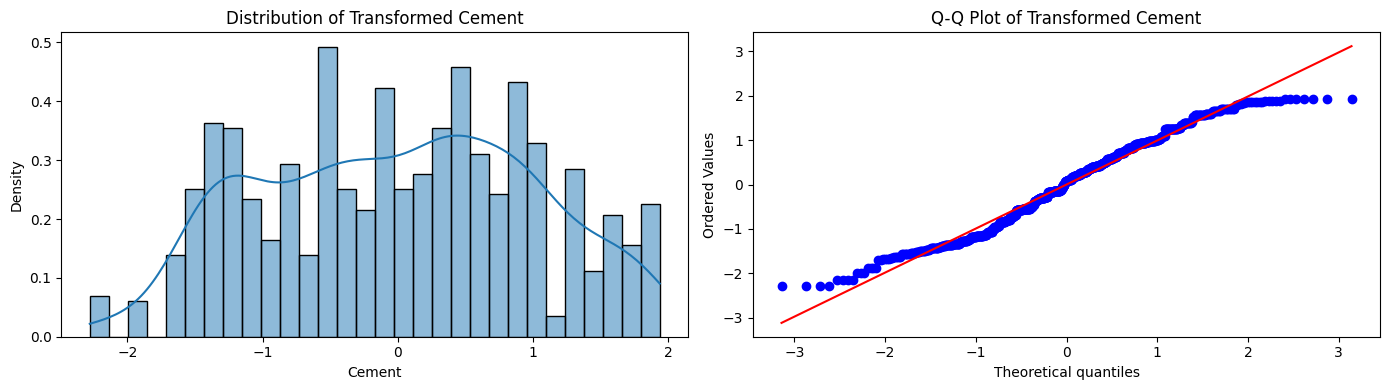

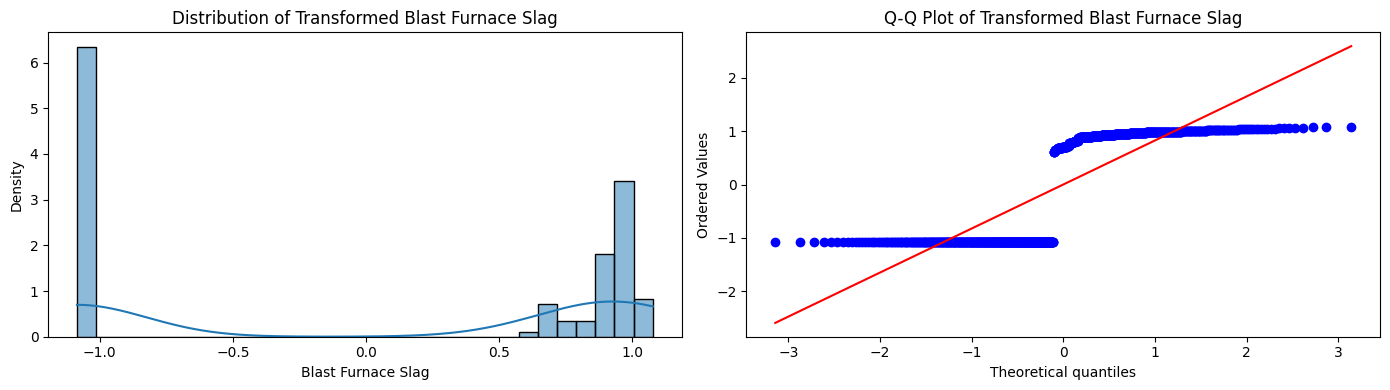

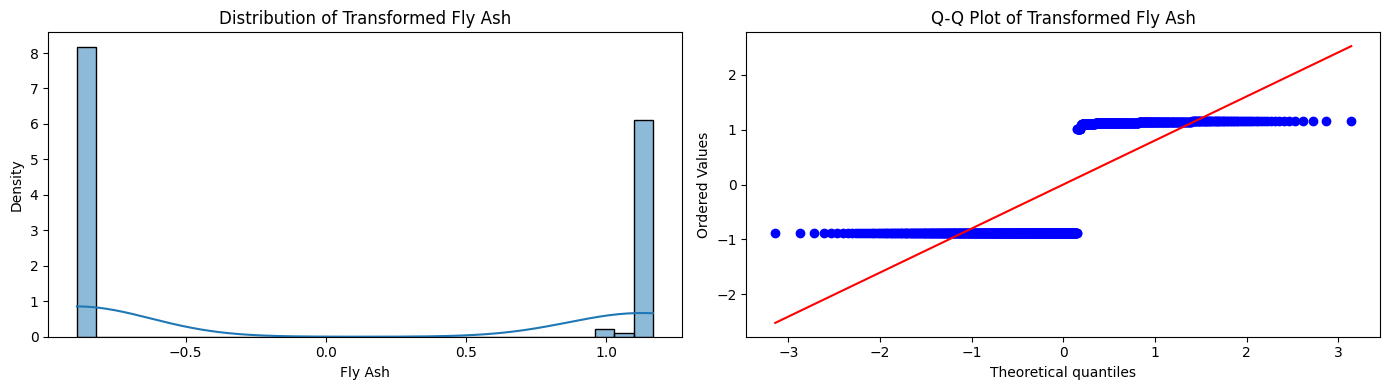

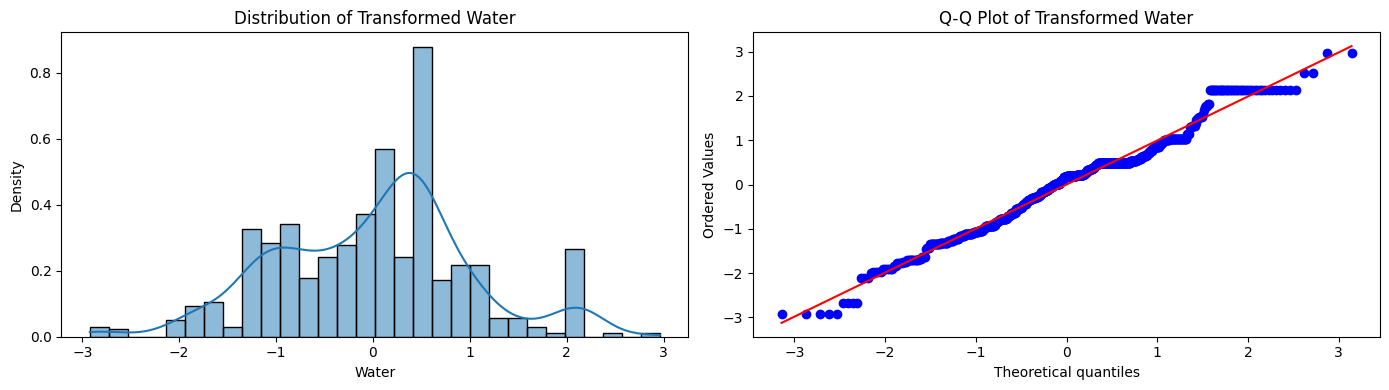

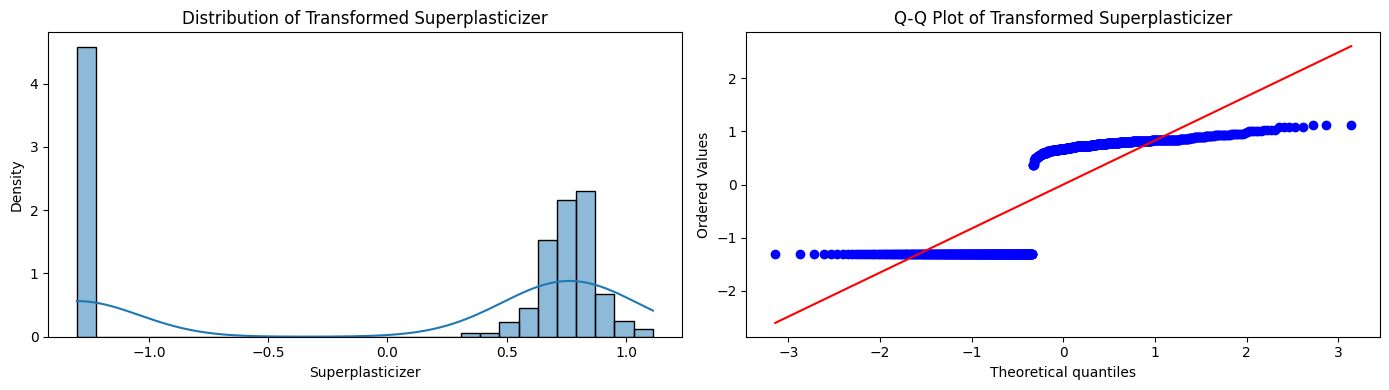

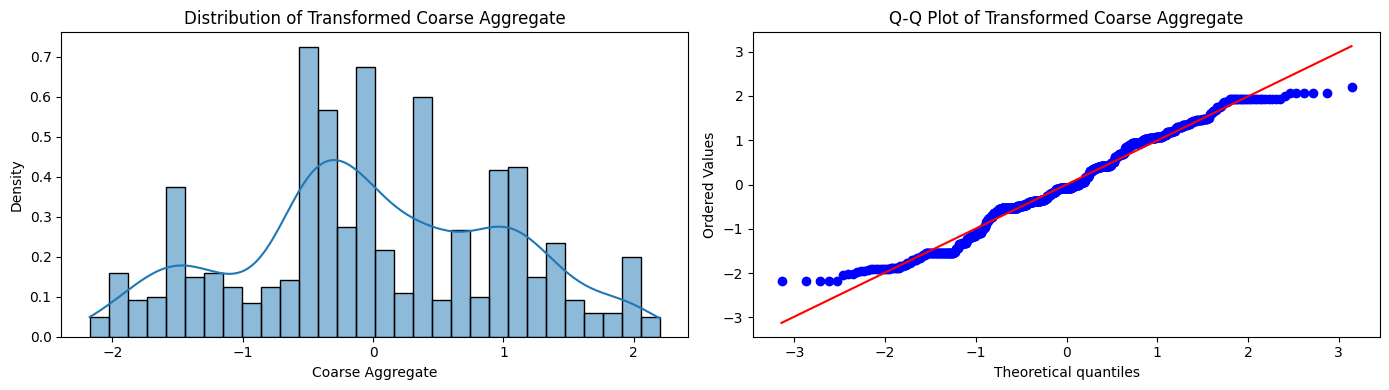

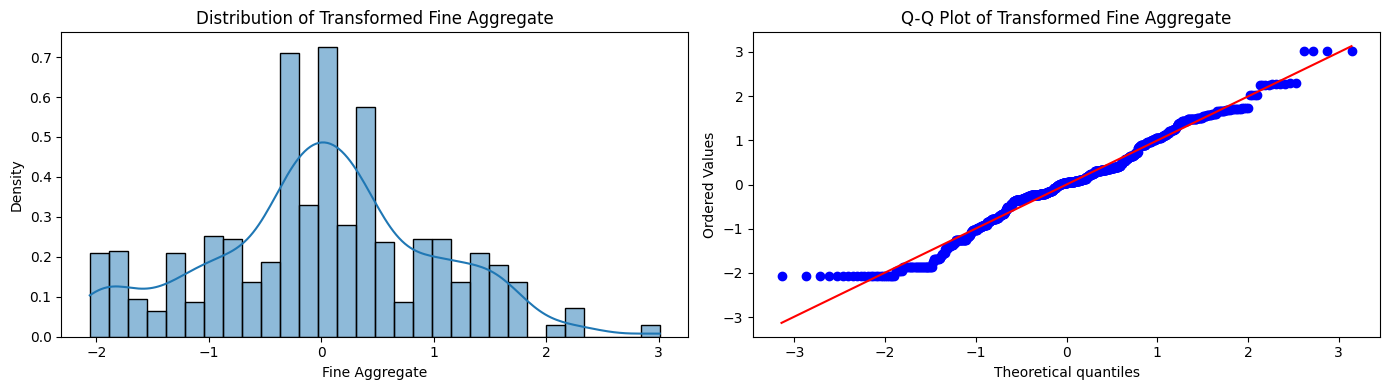

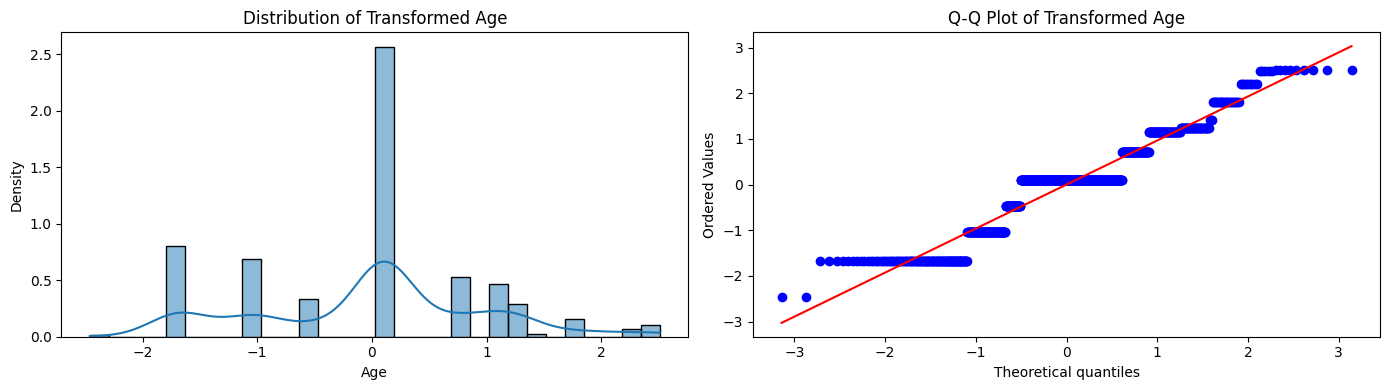

In [25]:

for col in X_train_transformed.columns:
    plt.figure(figsize=(14, 4))

    # Left: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_transformed[col], bins=30, kde=True, stat="density")
    plt.title(f'Distribution of Transformed {col}')

    # Right: Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Transformed {col}')

    plt.tight_layout()
    plt.show()


In [26]:
print("Model Performance Comparison:")
print(f" R² score without transformation: { r2_score(y_test, y_pred) }")
print(f"R² with Box-Cox transformation: {r2_score(y_test,y_pred2)}")
print(f"Improvement: {r2_score(y_test, y_pred2) - r2_score(y_test, y_pred)}")

Model Performance Comparison:
 R² score without transformation: 0.627553179231485
R² with Box-Cox transformation: 0.8047825011028631
Improvement: 0.17722932187137808


In [28]:
#### Using Yeo-Johnson transformation to make the distributions close to normal distributions

In [29]:

pt2= PowerTransformer()
X_train_transformed2= pt2.fit_transform(X_train)
X_test_transformed2= pt2.transform(X_test)

In [30]:

lr=LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3=lr.predict(X_test_transformed2)
print(f"R² score with Yeo-jhonson transformation: {r2_score(y_test, y_pred3)}")

R² score with Yeo-jhonson transformation: 0.8161906512004999


In [31]:
print("Model Performance Comparison:")
print(f"R² with standard scaling: {r2_score(y_test, y_pred)}")
print(f"R² with Box-Cox transformation: {r2_score(y_test, y_pred2)}")
print(f"R² with Yeo-Johnson transformation: {r2_score(y_test, y_pred3)}")

print(f"Improvement using Box-Cox transformation: {r2_score(y_test, y_pred2) - r2_score(y_test, y_pred)}")
print(f"Improvement using Yeo-Johnson transformation: {r2_score(y_test, y_pred3) - r2_score(y_test, y_pred)}")

Model Performance Comparison:
R² with standard scaling: 0.627553179231485
R² with Box-Cox transformation: 0.8047825011028631
R² with Yeo-Johnson transformation: 0.8161906512004999
Improvement using Box-Cox transformation: 0.17722932187137808
Improvement using Yeo-Johnson transformation: 0.18863747196901492
